# Demonstração do Algoritmo K-Means

**O clustering K-means** visa particionar _n_ observações em _K_ clusters nos quais cada observação pertence ao cluster com a média mais próxima, servindo como protótipo do cluster.

> **Projeto de Demonstração:** Neste exemplo, tentaremos agrupar flores Iris em três categorias que não conhecemos antecipadamente com base nos parâmetros `petal_length` e `petal_width` usando o algoritmo de aprendizado não supervisionado K-Means.


In [10]:
# Para facilitar a depuração do módulo logistic_regression, habilitamos a funcionalidade de recarregamento automático de módulos importados.
# Com isso, você pode alterar o código da biblioteca logistic_regression e todas essas alterações estarão disponíveis aqui.
%load_ext autoreload
%autoreload 2

# Adiciona a pasta raiz do projeto aos caminhos de carregamento do módulo.
import sys
sys.path.append('../..')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Importar Dependências

- [pandas](https://pandas.pydata.org/) - biblioteca que usaremos para carregar e exibir os dados em uma tabela
- [numpy](http://www.numpy.org/) - biblioteca que usaremos para operações de álgebra linear
- [matplotlib](https://matplotlib.org/) - biblioteca que usaremos para plotar os dados
- [k_means] - implementação personalizada do algoritmo K-Means


In [11]:
# Importar dependências de terceiros.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importar implementação personalizada de K-Means.



### Carregar os Dados

Neste demo, usaremos o [conjunto de dados Iris](http://archive.ics.uci.edu/ml/datasets/Iris).

O conjunto de dados consiste em várias amostras de cada uma das três espécies de Iris (`Iris setosa`, `Iris virginica` e `Iris versicolor`). Foram medidas quatro características de cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros. Com base na combinação dessas quatro características, [Ronald Fisher](https://en.wikipedia.org/wiki/Iris_flower_data_set) desenvolveu um modelo discriminante linear para distinguir as espécies entre si.


In [12]:
# Carregar os dados.
data = pd.read_csv('../../data/iris.csv')

# Exibir a tabela de dados.
data.head(10)


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,SETOSA
1,4.9,3.0,1.4,0.2,SETOSA
2,4.7,3.2,1.3,0.2,SETOSA
3,4.6,3.1,1.5,0.2,SETOSA
4,5.0,3.6,1.4,0.2,SETOSA
5,5.4,3.9,1.7,0.4,SETOSA
6,4.6,3.4,1.4,0.3,SETOSA
7,5.0,3.4,1.5,0.2,SETOSA
8,4.4,2.9,1.4,0.2,SETOSA
9,4.9,3.1,1.5,0.1,SETOSA


### Plotar os Dados

Vamos considerar dois parâmetros, `petal_length` e `petal_width`, para cada flor e plotar a dependência da classe Iris nesses dois parâmetros.

Como temos a vantagem de conhecer os rótulos reais das flores (classes), vamos ilustrar a classificação real no gráfico. Mas o algoritmo K-Means é um exemplo de algoritmo de aprendizado não supervisionado, o que significa que ele não precisa conhecer os rótulos. Portanto, abaixo neste demo, vamos tentar dividir as flores Iris em clusters desconhecidos e comparar o resultado dessa divisão com a classificação real das flores.


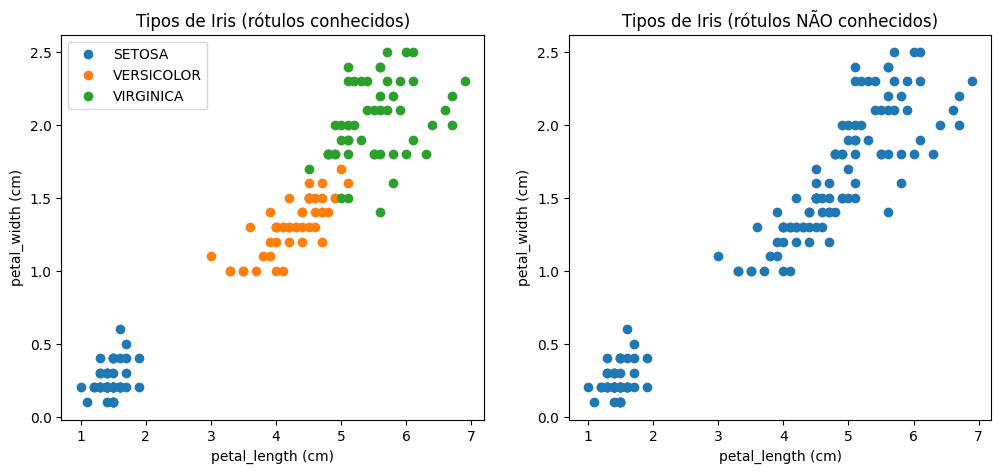

In [13]:
# Lista de classes de Iris suportadas.
iris_types = ['SETOSA', 'VERSICOLOR', 'VIRGINICA']

# Escolha dos parâmetros de Iris para consideração.
x_axis = 'petal_length'
y_axis = 'petal_width'

# Aumentar um pouco o tamanho do gráfico em relação ao padrão.
plt.figure(figsize=(12, 5))

# Plotar o gráfico de dispersão para cada tipo de Iris.
# Este é o caso em que conhecemos os rótulos das flores antecipadamente.
plt.subplot(1, 2, 1)
for iris_type in iris_types:
    plt.scatter(
        data[x_axis][data['class'] == iris_type],
        data[y_axis][data['class'] == iris_type],
        label=iris_type
    )
    
plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')
plt.title('Tipos de Iris (rótulos conhecidos)')
plt.legend()

# Plotar dispersão não classificada das flores Iris.
# Este é o caso em que não conhecemos os rótulos das flores antecipadamente.
# Assim é como o K-Means vê o conjunto de dados.
plt.subplot(1, 2, 2)
plt.scatter(
    data[x_axis][:],
    data[y_axis][:],
)
plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')
plt.title('Tipos de Iris (rótulos NÃO conhecidos)')

# Exibir todos os subplots.
plt.show()


### Preparar os Dados para Treinamento

Vamos extrair os dados de `petal_length` e `petal_width` e formar um conjunto de características de treinamento.

In [14]:
# Obter o número total de exemplos de Iris.
num_exemplos = data.shape[0]

# Obter características.
x_train = data[[x_axis, y_axis]].values.reshape((num_exemplos, 2))


### Iniciar e Treinar o Modelo de Regressão Logística

> ☝🏻 Este é o lugar onde você pode querer ajustar a configuração do modelo.

- `num_clusters` - número de clusters nos quais queremos dividir nosso conjunto de dados de treinamento.
- `max_iterations` - número máximo de iterações de treinamento.


In [17]:
# Configurar parâmetros do K-Means.
num_clusters = 3  # Número de clusters nos quais queremos dividir nosso conjunto de dados de treinamento.
max_iterations = 50  # número máximo de iterações de treinamento.

# Iniciar instância do K-Means.
k_means = KMeans(x_train, num_clusters)

# Treinar instância do K-Means.
(centroids, closest_centroids_ids) = k_means.train(max_iterations)


# Plotar os Resultados do Agrupamento

Agora vamos plotar a classificação original das flores Iris junto com os clusters não supervisionados do K-Means para ver como o algoritmo se saiu.


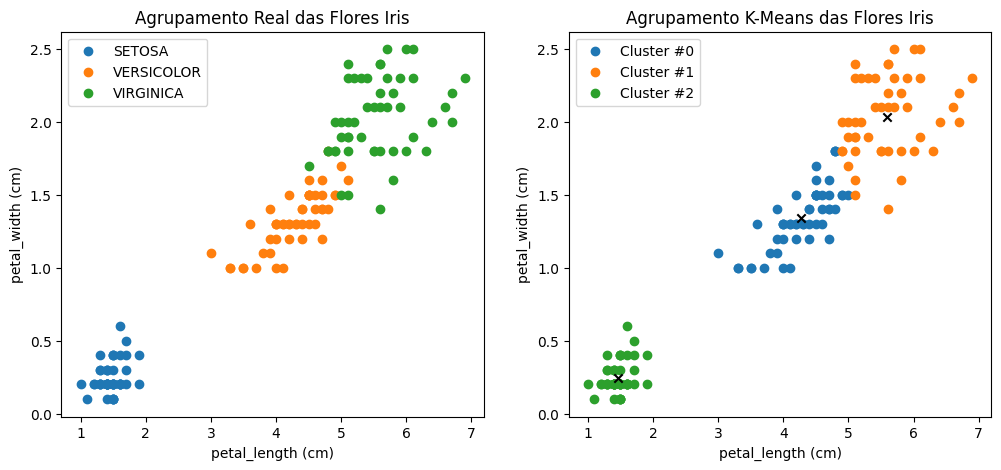

In [18]:
# Listar as Classes Suportadas de Iris
iris_types = ['SETOSA', 'VERSICOLOR', 'VIRGINICA']

# Escolher os parâmetros de Iris para consideração.
x_axis = 'petal_length'
y_axis = 'petal_width'

# Aumentar um pouco o tamanho do gráfico em relação ao padrão.
plt.figure(figsize=(12, 5))

# Plotar a classificação REAL das flores Iris.
plt.subplot(1, 2, 1)
for iris_type in iris_types:
    plt.scatter(
        data[x_axis][data['class'] == iris_type],
        data[y_axis][data['class'] == iris_type],
        label=iris_type
    )

plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')
plt.title('Agrupamento Real das Flores Iris')
plt.legend()

# Plotar o agrupamento NÃO SUPERVISIONADO das flores Iris.
plt.subplot(1, 2, 2)
for centroid_id, centroid in enumerate(centroids):
    current_examples_indices = (closest_centroids_ids == centroid_id).flatten()
    plt.scatter(
        data[x_axis][current_examples_indices],
        data[y_axis][current_examples_indices],
        label='Cluster #' + str(centroid_id)
    )

# Plotar os centróides dos clusters.
for centroid_id, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], c='black', marker='x')
    
plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')
plt.title('Agrupamento K-Means das Flores Iris')
plt.legend()

# Mostrar todos os subplots.
plt.show()
